<a href="https://colab.research.google.com/github/jkreddy123/coursera_tensorflow_certification_couse/blob/main/coursera_tensorflow_certification_couse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Week1**
apply neural nets on two numpy arrays X and y

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd


x = np.array([1,2,3,4,6,9])
y = np.array([3,5,7,9,13,19])
x_test = np.array(np.arange(0,100))

model = tf.keras.Sequential([tf.keras.layers.Dense(units=1,input_shape=[1])])

model.compile(optimizer = tf.keras.optimizers.SGD(),
              loss = tf.keras.losses.mae,
              metrics=['accuracy'])
history = model.fit(x=x,y=y,validation_split=0.2,epochs=10,verbose=0)

hist_df = pd.DataFrame(history.history) 
print(hist_df)

y_pred = model.predict(x_test)
y_pred = y_pred.reshape(100,)
print(x_test.shape,y_pred.shape)
X = np.column_stack((x_test,y_pred))
print(np.column_stack((x_test,y_pred)))

**Week 2**

Neural nets on fashioin_mnist

In [23]:
class mycallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch, logs={}):
    if(logs.get('accuracy')>0.9):
      print("early stopping")
      self.model.stop_training=True

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
callback = mycallback()

mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train),(x_test,y_test) = mnist.load_data()

print(x_train[0].shape, y_train.shape, x_test.shape)

print(np.unique(y_train))
x_train = x_train/255.
x_test = x_test/255.
#x_train = tf.placeholder(x_train, shape=(None,28,28))

model = tf.keras.Sequential([
                            #tf.keras.layers.Conv1D(filters=1,kernel_size=1, input_shape=(28,28)),
                            # tf.keras.layers.MaxPool1D(2),

                            # tf.keras.layers.Dense(10)
                            tf.keras.layers.Flatten(input_shape=(28,28)),
                            tf.keras.layers.Dense(120,activation=tf.keras.activations.relu),
                            tf.keras.layers.Dense(10,activation=tf.keras.activations.softmax)
                        ])
model.compile(optimizer=tf.keras.optimizers.Adam() ,
              loss = tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])
#print(tf.one_hot(y_train[:100],depth=10,axis =-1))
#history = model.fit(x_train,tf.one_hot(y_train,depth=10,axis =-1),epochs=10,batch_size=32)
history = model.fit(x_train,y_train,epochs=10,batch_size=32,callbacks=[callback])
print(pd.DataFrame(history.history))
#loss, Accuracy = model.evaluate(x_test,tf.one_hot(y_test,depth=10,axis =-1))
loss, Accuracy = model.evaluate(x_test,y_test)

print(loss, Accuracy)
plt.imshow(x_train[0])
x_train = x_train[:,tf.newaxis,...]
print(x_train[0].shape)
plt.suptitle(model.predict(x_train[0]))

**MNIST numbers**

In [ ]:
# YOUR CODE SHOULD START HERE
# YOUR CODE SHOULD END HERE
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
callback = mycallback()

mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
# YOUR CODE SHOULD START HERE
print(x_train.shape,y_train.shape,x_test.shape)
# YOUR CODE SHOULD END HERE
input_shape = (28, 28,1)
model = tf.keras.models.Sequential([
# YOUR CODE SHOULD START HERE
    tf.keras.layers.Conv2D(64,(3,3),input_shape=input_shape,activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120,activation='relu'),
    tf.keras.layers.Dense(10,activation=tf.keras.activations.softmax)
# YOUR CODE SHOULD END HERE
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# YOUR CODE SHOULD START HERE
# YOUR CODE SHOULD END HERE
model.summary()
x_train = x_train[..., tf.newaxis]
history = model.fit(x_train,y_train,epochs=10,callbacks=[callback])
print(pd.DataFrame(history.history))
x_test = x_test[..., tf.newaxis]
loss, accuracy = model.evaluate(x_test,y_test)
print(loss, accuracy)
plt.imshow(tf.squeeze(x_test[0]))
print(y_test[0])
plt.imshow(tf.squeeze(x_test[0]))
x_test = x_test[:, tf.newaxis,...]
y_predict = model.predict(x_test[0])
print(y_predict.shape,y_predict,tf.argmax(tf.squeeze(y_predict)))
plt.suptitle((tf.argmax(tf.squeeze(y_predict)),tf.int64).numpy())

**WEEK 4**

using image generator to read and classify horses/humans using CNN

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O /tmp/validation-horse-or-human.zip
!unzip /tmp/horse-or-human.zip
!mkdir horse_humans
!mv horses/ horse_humans
!mv humans/ horse_humans

!mkdir val_horse_humans
!unzip /tmp/validation-horse-or-human.zip -d val_horse_humans/

['humans', 'horses']
Found 1027 images belonging to 2 classes.
dict_keys(['horses', 'humans']) [0 0 0 ... 1 1 1]
(128, 300, 300, 3)


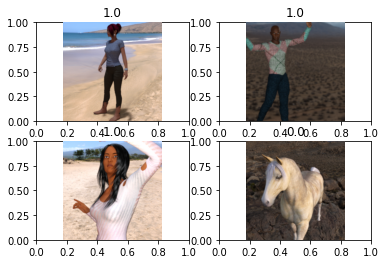

Found 256 images belonging to 2 classes.


In [55]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import matplotlib.pyplot as plt

dataset_dir = os.path.join("/content/horse_humans")
train_horse_names = os.listdir(dataset_dir)
print(train_horse_names[:10])
train_generator = ImageDataGenerator(rescale=1/255.)
train_gen = train_generator.flow_from_directory(directory='/content/horse_humans',
                                                batch_size = 128,
                                                target_size=(300,300),
                                                class_mode="binary"
                                                )
print(train_gen.class_indices.keys(),train_gen.labels)

batch = next(train_gen)
print(batch[0].shape)

fig, ax = plt.subplots(nrows=2, ncols=2)
for i in range(1,5):
  fig.add_subplot(2, 2, i)
  plt.imshow(batch[0][i])
  plt.title(batch[1][i])
  plt.axis('off')
  
plt.show()

val_generator = ImageDataGenerator(rescale=1/255.)
val_gen = val_generator.flow_from_directory(directory='/content/val_horse_humans',
                                                batch_size = 32,
                                                target_size=(300,300),
                                                class_mode="binary"
                                                )

In [57]:
import tensorflow as tf
import pandas as pd
model = tf.keras.models.Sequential([
          tf.keras.layers.Conv2D(16,(3,3),input_shape=(300,300,3),activation='relu'),
          tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
          tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
          tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
          tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
          tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
          tf.keras.layers.Flatten(),
          tf.keras.layers.Dense(128,activation=tf.keras.activations.relu),
          tf.keras.layers.Dense(1,activation=tf.keras.activations.sigmoid)

])
model.compile(optimizer=tf.keras.optimizers.RMSprop(),
              loss=tf.keras.losses.binary_crossentropy,
              metrics=['accuracy'])
history = model.fit(train_gen, validation_data=val_gen, epochs=5)
print(pd.DataFrame(history.history))


Epoch 1/5
9/9 [==============================] - 97s 10s/step - loss: 7.4280 - accuracy: 0.5260 - val_loss: 0.6302 - val_accuracy: 0.6719
Epoch 2/5
9/9 [==============================] - 84s 10s/step - loss: 0.5783 - accuracy: 0.6458 - val_loss: 0.3405 - val_accuracy: 0.8867
Epoch 3/5
9/9 [==============================] - 85s 9s/step - loss: 0.6904 - accuracy: 0.6673 - val_loss: 0.8157 - val_accuracy: 0.7266
Epoch 4/5
9/9 [==============================] - 85s 9s/step - loss: 0.2988 - accuracy: 0.9258 - val_loss: 0.6023 - val_accuracy: 0.8242
Epoch 5/5
9/9 [==============================] - 85s 9s/step - loss: 0.1063 - accuracy: 0.9684 - val_loss: 2.0348 - val_accuracy: 0.5742
       loss  accuracy  val_loss  val_accuracy
0  5.047047  0.532619  0.630223      0.671875
1  0.505611  0.730282  0.340533      0.886719
2  0.571132  0.707887  0.815660      0.726562
3  0.359823  0.909445  0.602258      0.824219
4  0.095848  0.967868  2.034827      0.574219


In [ ]:
print(model.summary())

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  print(x.shape)
  x = np.expand_dims(x, axis=0)
  print(x.shape)
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes)
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")
 

**Course 2: CNN**

--------------------------------------------------------------------------------

**Week1**

cats Vs Dogs 2000+1000 images

**week2**

Image Augmentation using ImageDataGenerator parameters(rescale/shear/flip etc)

In [ ]:
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O /tmp/cats_and_dogs_filtered.zip
!mkdir cats_dogs/
!unzip /tmp/cats_and_dogs_filtered.zip -d cats_dogs/


In [3]:
import os
base_dir = '/content/cats_dogs/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir,'train')

train_cats_dir = os.path.join(train_dir,'cats')
train_dogs_dir = os.path.join(train_dir,'dogs')
print('number of cats in training directory',len(os.listdir(train_cats_dir)))
print('number of dogs in training directory',len(os.listdir(train_dogs_dir)))

val_dir = os.path.join(base_dir,'validation')
val_cats_dir = os.path.join(val_dir,'cats')
val_dogs_dir = os.path.join(val_dir,'dogs')
print('number of cats in validation directory',len(os.listdir(val_cats_dir)))
print('number of dogs in validation directory',len(os.listdir(val_dogs_dir)))

number of cats in training directory 1000
number of dogs in training directory 1000
number of cats in validation directory 500
number of dogs in validation directory 500


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


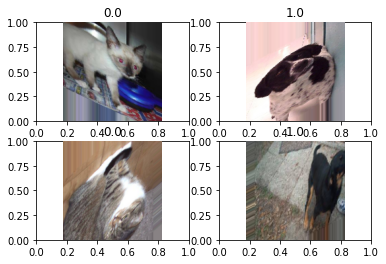

In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_generator_cats_dogs = ImageDataGenerator(rescale=1./255.,
                                               horizontal_flip=True,
                                               vertical_flip=True,
                                               shear_range = 40.0,
                                               width_shift_range=20.0,
                                               height_shift_range=20.0,
                                               zoom_range=0.4)
train_gen_cd = train_generator_cats_dogs.flow_from_directory(directory="/content/cats_dogs/cats_and_dogs_filtered/train",
                                                          batch_size=128,
                                                          target_size=(150,150),
                                                          class_mode = 'binary')
batch = next(train_gen_cd)
fig,ax = plt.subplots(ncols=2,nrows=2)
for i in range(1,5):
  fig.add_subplot(2,2,i)
  plt.imshow(batch[0][i])
  plt.title(batch[1][i])
  plt.axis('off')

val_generator_cats_dogs = ImageDataGenerator(rescale=1./255.)
val_gen_cd = val_generator_cats_dogs.flow_from_directory(directory='/content/cats_dogs/cats_and_dogs_filtered/validation',
                                                         batch_size = 32,
                                                         target_size=(150,150),
                                                         class_mode='binary')


In [ ]:
import pandas as pd

model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(16,(3,3),activation=tf.keras.activations.relu,input_shape=(150,150,3)),
                                    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    tf.keras.layers.Conv2D(32,(3,3),activation=tf.keras.activations.relu),
                                    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    tf.keras.layers.Conv2D(64,(3,3),activation=tf.keras.activations.relu),
                                    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),  
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512,activation=tf.keras.activations.relu) ,
                                    tf.keras.layers.Dense(1,activation=tf.keras.activations.sigmoid)                                 
])
model.compile(optimizer = tf.keras.optimizers.RMSprop(),
              loss=tf.keras.losses.binary_crossentropy,
              metrics=['accuracy'])
history = model.fit(train_gen_cd,epochs=100,validation_data=val_gen_cd)
print(pd.DataFrame(history.history))

Text(0.5, 1.0, 'Training and validation loss')

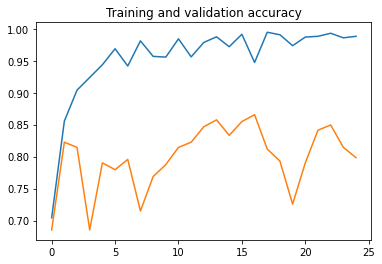

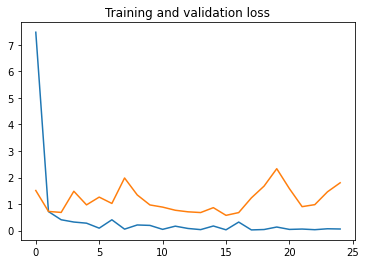

In [40]:
epochs = range(len(history.history['accuracy']))
plt.plot  ( epochs,     history.history['accuracy'] )
plt.plot  ( epochs, history.history['val_accuracy'] )
plt.title ('Training and validation accuracy')
plt.figure()
plt.plot  ( epochs,   history.history['loss'] )
plt.plot  ( epochs, history.history['val_loss'] )
plt.title ('Training and validation loss'   )

**WEEK3**

----------------------------------------------------------------------------

Transfer learning using inception model

In [36]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
#download dataset from code in previous cells with augmentation

--2021-03-30 15:30:21--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.128, 74.125.142.128, 2607:f8b0:400e:c09::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   142MB/s    in 0.6s    

2021-03-30 15:30:22 (142 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [ ]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.applications.inception_v3 import InceptionV3

inception_model = InceptionV3(input_shape=(150,150,3),include_top=False,weights=None)
inception_model.load_weights('/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5')
#inception_model.summary()
for layer in inception_model.layers:
  layer.trainable = False
output_layer = inception_model.get_layer('mixed7')
x = tf.keras.layers.Flatten()(output_layer.output)
x = tf.keras.layers.Dense(512,activation=tf.keras.activations.relu)(x)
x=tf.keras.layers.Dropout(0.1)(x)
x = tf.keras.layers.Dense(1,activation=tf.keras.activations.sigmoid)(x)
model = tf.keras.Model(inception_model.inputs,x)
model.compile(optimizer=tf.keras.optimizers.RMSprop(),
              loss=tf.keras.losses.binary_crossentropy,
              metrics=['accuracy'])
history = model.fit(train_gen_cd,epochs=100,validation_data=val_gen_cd)
print(pd.DataFrame(history.history))

**WEEK 4**

-------------------------------------------------------------

Rock paper scissor multi class classification for transfer learning

In [ ]:
!wget https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip -O train_rps.zip
!mkdir train/
!unzip train_rps.zip -d train/
!wget https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip -O test_rps.zip
!mkdir test/
!unzip test_rps.zip -d test/
!wget https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-validation.zip -O valid_rps.zip
!mkdir valid/
!unzip valid_rps.zip -d valid/

In [20]:
import os
import pathlib


print(len(list(pathlib.Path('/content/train/rps/paper').glob('*.png'))))
print(len(list(pathlib.Path('/content/train/rps/rock').glob('*.png'))))
print(len(list(pathlib.Path('/content/train/rps/scissors').glob('*.png'))))
print(len(list(pathlib.Path('/content/test/rps-test-set/paper').glob('*.png'))))
print(len(list(pathlib.Path('/content/test/rps-test-set').glob('*/*.png'))))

840
840
840
124
372


Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.
(150, 150, 3)


/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


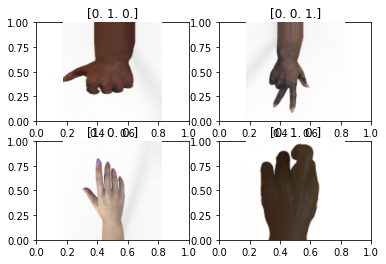

In [38]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_generator_rps = ImageDataGenerator(rescale=1./255,
                                         vertical_flip=True,
                                         horizontal_flip=True,
                                         width_shift_range=20.0,
                                         height_shift_range=20.0,
                                         zoom_range=0.4)
train_gen_rps = train_generator_rps.flow_from_directory(directory='/content/train/rps',
                                                        target_size = (150,150),
                                                        batch_size=128,
                                                        class_mode='categorical')
valid_generator_rps = ImageDataGenerator(rescale=1./255,
                                         vertical_flip=True,
                                         horizontal_flip=True,
                                         width_shift_range=0.2,
                                         height_shift_range=0.2,
                                         shear_range=0.2,
                                         zoom_range=0.4)
valid_gen_rps = valid_generator_rps.flow_from_directory(directory='/content/test/rps-test-set',
                                                        target_size = (150,150),
                                                        batch_size=32,
                                                        class_mode='categorical')

batch = next(train_gen_rps)
print(batch[0][1].shape)
fig, ax = plt.subplots(ncols=2,nrows=2)
for i in range(1,5):
  fig.add_subplot(2,2,i)
  plt.imshow(batch[0][i])
  plt.title(batch[1][i])
  plt.axis("off")


In [ ]:
import pandas as pd
from tensorflow.keras.applications.inception_v3 import InceptionV3

pretrained_model = InceptionV3(input_shape=(150,150,3),include_top=False,weights=None)
pretrained_model.load_weights('/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5')
#pretrained_model.summary()

for layer in pretrained_model.layers:
  layer.trainable=False
output_layer = pretrained_model.get_layer('mixed7')
x=tf.keras.layers.Flatten()(output_layer.output)
x=tf.keras.layers.Dense(1024,activation=tf.keras.activations.relu)(x)
x=tf.keras.layers.Dropout(0.2)(x)
x=tf.keras.layers.Dense(3,activation=tf.keras.activations.softmax)(x)

model = tf.keras.Model(pretrained_model.input,x)
model.compile(optimizer = tf.keras.optimizers.RMSprop(lr=0.001),
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])
history = model.fit(train_gen_rps,epochs=25,validation_data=valid_gen_rps,verbose=1)
model.save("rps.h5")
print(pd.DataFrame(history.history))

**Course 2: excercise**

---------------------------------------------------------------

American sign language image dataset

In [1]:
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import files
uploaded=files.upload()

Saving archive.zip to archive.zip


In [2]:
!unzip archive.zip -d signMNIST

Archive:  archive.zip
  inflating: signMNIST/amer_sign2.png  
  inflating: signMNIST/amer_sign3.png  
  inflating: signMNIST/american_sign_language.PNG  
  inflating: signMNIST/sign_mnist_test.csv  
  inflating: signMNIST/sign_mnist_test/sign_mnist_test.csv  
  inflating: signMNIST/sign_mnist_train.csv  
  inflating: signMNIST/sign_mnist_train/sign_mnist_train.csv  


3000
6000
9000
12000
15000
18000
21000
24000
27000
3000
6000
(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


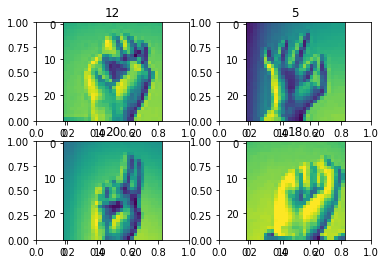

In [23]:
import matplotlib.pyplot as plt
import random
def get_data(filename):
  # You will need to write code that will read the file passed
  # into this function. The first line contains the column headers
  # so you should ignore it
  # Each successive line contians 785 comma separated values between 0 and 255
  # The first value is the label
  # The rest are the pixel values for that picture
  # The function will return 2 np.array types. One with all the labels
  # One with all the images
  #
  # Tips: 
  # If you read a full line (as 'row') then row[0] has the label
  # and row[1:785] has the 784 pixel values
  # Take a look at np.array_split to turn the 784 pixels into 28x28
  # You are reading in strings, but need the values to be floats
  # Check out np.array().astype for a conversion
    images = np.empty(shape=(0,28, 28),dtype=float)
    labels = np.empty(0,dtype=int)
    count=0
    with open(filename) as training_file:
      # Your code starts here
      line = training_file.readline()
      while True:
        count += 1
        if(count%3000 == 0):
          print(count)
          #break
        # Get next line from file
        line = training_file.readline()
        # if line is empty
        # end of file is reached
        if not line:
         break
        line = line.split(',')
        #for textstr in line[2:].split(','):
        #  print(textstr)
        #  print(int(textstr))
        imgarr = [int(textstr) for textstr in line[1:]]
        #print(imgarr)
        images = np.append(images,np.reshape(imgarr,(1,28,28)),axis=0)
        labels = np.append(labels,int(line[0]))
        #print(labels,len(labels))

 
      training_file.close()
      # Your code ends here
    return images, labels


training_images, training_labels = get_data('/content/signMNIST/sign_mnist_train/sign_mnist_train.csv')
testing_images, testing_labels = get_data('/content/signMNIST/sign_mnist_test/sign_mnist_test.csv')
training_labels[0]=9 #missing labels caused loss to go NAN during training
testing_labels[0]=9
# Keep these
print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

fig,ax = plt.subplots(ncols=2,nrows=2)
for i in range(1,5):
  fig.add_subplot(2,2,i)
  k = random.randint(0,len(training_images))
  plt.imshow(training_images[k])
  plt.title(training_labels[k])

training_images = training_images[...,np.newaxis] # Your Code Here
testing_images = testing_images[...,np.newaxis]# Your Code Here
# Their output should be:
# (27455, 28, 28)
# (27455,)
# (7172, 28, 28)
# (7172,)

In [ ]:
print(np.unique(training_labels))
print(np.unique(testing_labels))
print(np.isnan(np.sum(testing_labels)))
print(np.isnan(np.sum(training_images)))
print(np.isnan(np.sum(testing_images)))

unique, counts = np.unique(testing_labels, return_counts=True)
print(np.asarray((unique, counts)).T)

In [ ]:
# In this section you will have to add another dimension to the data
# So, for example, if your array is (10000, 28, 28)
# You will need to make it (10000, 28, 28, 1)
# Hint: np.expand_dims
from tensorflow.keras.applications.inception_v3 import InceptionV3



# Create an ImageDataGenerator and do Image Augmentation
train_datagen = ImageDataGenerator(
    # Your Code Here
    rescale=1./255.,
    zoom_range=0.4
    )
train_gen_america = train_datagen.flow(x=training_images, y=training_labels, batch_size=32)
validation_datagen = ImageDataGenerator(
    # Your Code Here
    rescale = 1./255.,
    )
valid_gen_america =  validation_datagen.flow(x=testing_images, y=testing_labels, batch_size=32)

# Keep These
print(training_images.shape)
print(testing_images.shape)

# Their output should be:
# (27455, 28, 28, 1)
# (7172, 28, 28, 1)

# Define the model
# Use no more than 2 Conv2D and 2 MaxPooling2D
model = tf.keras.models.Sequential([
    # Your Code Here
    tf.keras.layers.Conv2D(16,(3,3),activation=tf.keras.activations.relu,input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    #tf.keras.layers.Conv2D(32,(3,3),activation=tf.keras.activations.relu),
    #tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256,activation=tf.keras.activations.relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(25,activation=tf.keras.activations.softmax)
])

# Compile Model. 
model.compile(# Your Code Here
              optimizer=tf.keras.optimizers.Adam(lr=0.001),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])
model.summary()
# Train the Model
history = model.fit(# Your Code Here
                    train_gen_america,epochs=40,validation_data=valid_gen_america,verbose=1)

loss, accuracy = model.evaluate(valid_gen_america)#testing_images, testing_labels)
print(loss,accuracy)
# The output from model.evaluate should be close to:
[6.92426086682151, 0.56609035]
